# Pydy Tuesday 12-08-2025 - Extreme Weather Attribution Studies

### 1. Import Libraries

In [1]:
import sys
import pydytuesday
import pandas as pd

# For Data Visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("Python:", sys.version)
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)

Python: 3.12.3 (tags/v3.12.3:f6650f9, Apr  9 2024, 14:05:25) [MSC v.1938 64 bit (AMD64)]
pandas: 2.3.0
matplotlib: 3.6.2
seaborn: 0.13.2


### 2.a. Load Data from the official pydytuesday repo

In [3]:
# Use date to fetch the files for that week
pydytuesday.get_date('2025-08-12')

Trying to fetch README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-08-12/readme.md
Successfully fetched README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-08-12/readme.md
Successfully saved attribution_studies.csv to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_12082025\attribution_studies.csv
Successfully saved attribution_studies_raw.csv to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_12082025\attribution_studies_raw.csv
Successfully saved extremes.png to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_12082025\extremes.png
Successfully saved meta.yaml to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_12082025\meta.yaml


### 2.b. Load data into dataframe using Pandas and do initial exploration

In [4]:
# Load datasets using Pandas 
attribution_studies = pd.read_csv('attribution_studies.csv')
attribution_studies_raw = pd.read_csv('attribution_studies_raw.csv')

# Store all the files in a dictionary
datafiles = {
    "attribution_studies": attribution_studies,
    "attribution_studies_raw": attribution_studies_raw
}

# Print info for all the files
for filename, df in datafiles.items():
    print(f" {filename} Info: \n")
    print(df.info())
    print("\n" + "-"*60 + "\n")

 attribution_studies Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   event_name         744 non-null    object 
 1   event_period       735 non-null    object 
 2   event_year         592 non-null    object 
 3   study_focus        744 non-null    object 
 4   iso_country_code   520 non-null    object 
 5   cb_region          744 non-null    object 
 6   event_type         744 non-null    object 
 7   classification     744 non-null    object 
 8   summary_statement  744 non-null    object 
 9   publication_year   743 non-null    float64
 10  citation           743 non-null    object 
 11  source             744 non-null    object 
 12  rapid_study        744 non-null    object 
 13  link               744 non-null    object 
dtypes: float64(1), object(13)
memory usage: 81.5+ KB
None

--------------------------------------

In [6]:
# Set option to view data in single line
pd.set_option('display.width', 1000)

# See statistical info of all features (including categorical features) 
print(attribution_studies.describe(include='all'))

             event_name event_period event_year study_focus iso_country_code cb_region event_type                       classification                                  summary_statement  publication_year                                           citation                                           source rapid_study                                               link
count               744          735        592         744              520       744        744                                  744                                                744         743.00000                                                743                                              744         744                                                744
unique              678          271         72           2               95        13         12                                    4                                                681               NaN                                                616            

In [ ]:
# See statistical info of the raw dataframe
print(attribution_studies_raw.describe(include='all'))

                          name event_year_trend iso_country_code cb_region event_type                       classification                                  summary_statement  publication_year                                           citation                                           source rapid_study                                               link
count                      744              743              520       744        744                                  744                                                744         743.00000                                                743                                              744         744                                                744
unique                     729               73               95        13         12                                    4                                                681               NaN                                                616                                               7

In [8]:
# See data samples from both dataframes
print("\n attribution_studies sample rows:\n", attribution_studies.head())
print("\n attribution_studies_raw sample rows:\n", attribution_studies_raw.head())


 attribution_studies sample rows:
                                           event_name event_period event_year study_focus iso_country_code            cb_region event_type                       classification                                  summary_statement  publication_year                                           citation                                           source rapid_study                                               link
0                           European summer heatwave         2003       2003       Event              NaN               Europe       Heat  More severe or more likely to occur  "We estimate it is very likely (confidence lev...            2004.0  Stott, P. et al., 2004: Human contribution to ...                                           Nature          No  https://www.nature.com/nature/journal/v432/n70...
1                        Global temperature extremes   since 1950        NaN       Trend              NaN               Global       Heat  More severe

From the initial exploration of the dataframes, it can be seen that the 'attribution_studies' dataframe is a processed version of the raw dataframe, which has the columns 'event_period', 'event_year', and 'study_focus' that are different/additional to the single column 'event_year_trend' in the raw dataframe. This has been done in an attempt to classify a data point as an 'event' which occurred in a single year (e.g 2003) or adjacent two years(e.g. 2009-2010), or as a 'trend' which spans across multiple years.  
  
Henceforth, only the 'attribution_studies' dataframe will be used for further exploratory analysis.


In [9]:
# Check for nulls in  df
attribution_studies.isnull().sum()

event_name             0
event_period           9
event_year           152
study_focus            0
iso_country_code     224
cb_region              0
event_type             0
classification         0
summary_statement      0
publication_year       1
citation               1
source                 0
rapid_study            0
link                   0
dtype: int64

#### Observation on missing values:  
- Out of a total of 744 entries, 152 entries have missing 'event_year'. These could most likely be trends that spanned over a longer period of years.  
- 'iso_country_code' is another field with significant missing data (224 entries). These are most likely the cases where an event or trend affected larger areas than a single country, like a wider region (e.g. a continent) or multiple regions or the entire world.  
  

It is worth noting the nature of the missing values, i.e., they are not missing randomly by chance, rather they are indicative of some specific scenarios within the data and hence, need to be handled accordingly.

In [ ]:
attribution_studies['study_focus'].value_counts()

study_focus
Event    593
Trend    151
Name: count, dtype: int64

In [14]:
attribution_studies['cb_region'].value_counts()

cb_region
Europe                              165
Eastern and south-eastern Asia      161
Northern America                    137
Global                               63
Sub-Saharan Africa                   56
Australia and New Zealand            49
Central and southern Asia            36
Latin America and the Caribbean      32
Northern hemisphere                  15
Arctic                               11
Northern Africa and western Asia      8
Oceania                               8
Antarctica                            3
Name: count, dtype: int64

In [16]:
attribution_studies['classification'].value_counts()

classification
More severe or more likely to occur              554
No discernible human influence                    71
Decrease, less severe or less likely to occur     66
Insufficient data/inconclusive                    53
Name: count, dtype: int64

### 3. Exploratory Data Analysis

### 3.1. Which extreme weather event dominates the attribution studies?

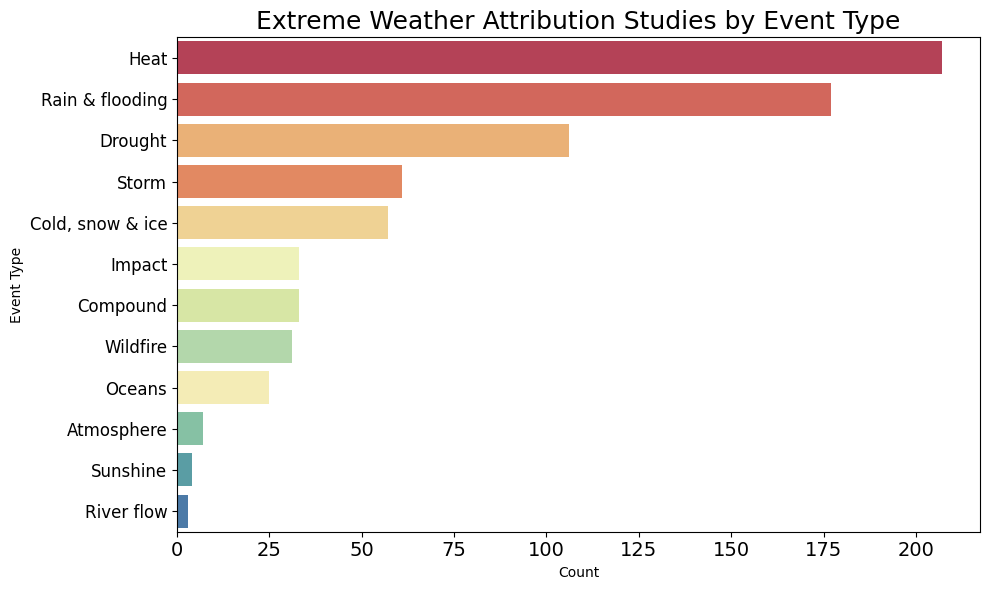

In [ ]:
# Count event types and keep the order from value_counts()
order = attribution_studies['event_type'].value_counts().index

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=attribution_studies, y="event_type", hue="event_type", legend=False, order=order, palette="Spectral")
plt.title("Extreme Weather Attribution Studies by Event Type", fontsize=18)
plt.xlabel("Count")
plt.ylabel("Event Type")
plt.xticks(size=14)
plt.yticks(size=12)
plt.tight_layout()
plt.show()

### 3.2. Region-wise Extreme Weather Events Studies

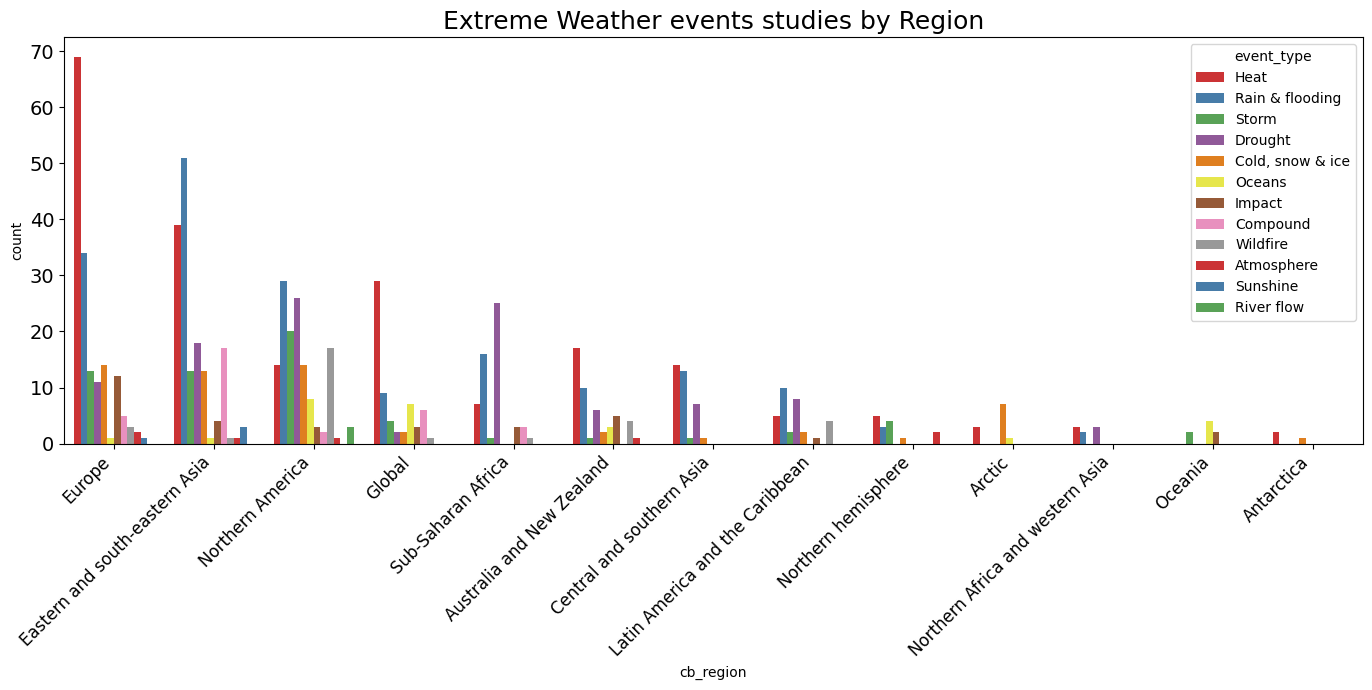

In [ ]:
plt.figure(figsize=(14, 7))
order = df['cb_region'].value_counts().index
sns.countplot(data=attribution_studies, x="cb_region", hue="event_type", palette="Set1", order=order)
plt.xticks(rotation=45, ha="right", size=12)
plt.yticks(size=14)
plt.title("Extreme Weather events studies by Region", size=18)
plt.tight_layout()
plt.show()


### 3.3. Weather Changes Classification by Region - Which areas are most severely affected by climate change (as per attribution studies)?

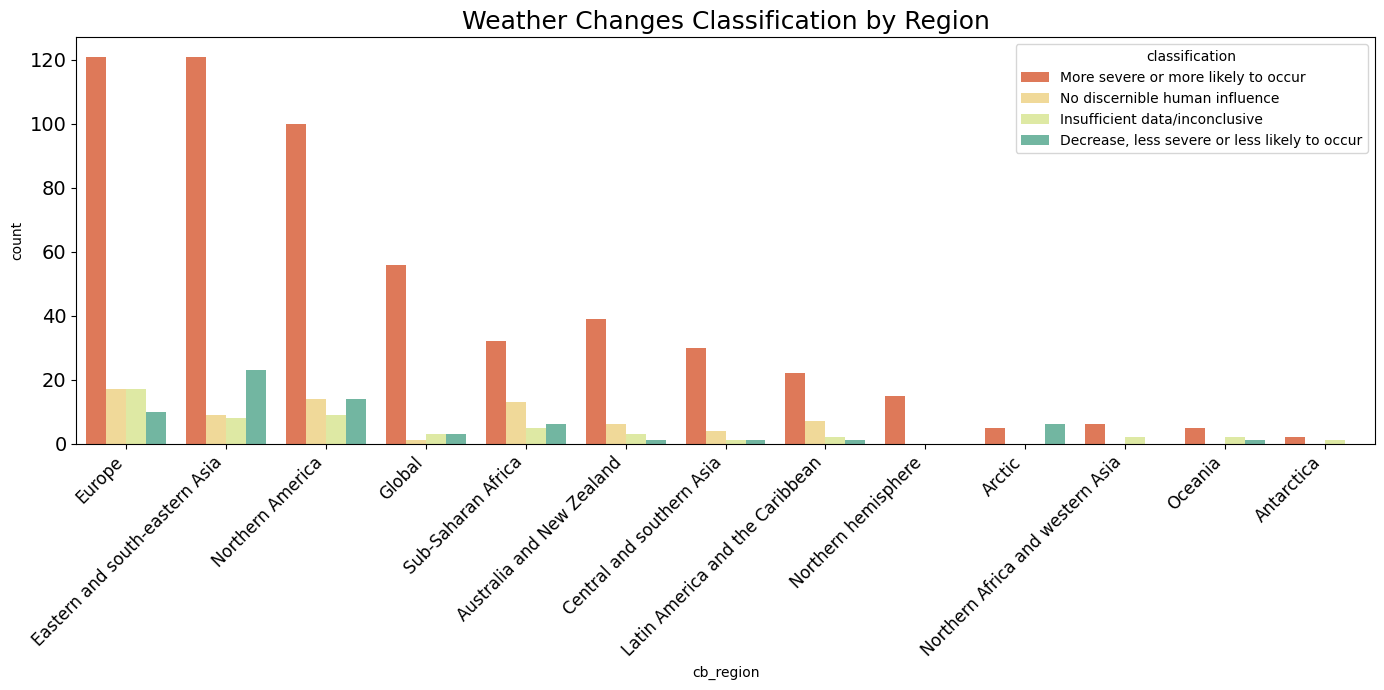

In [81]:
plt.figure(figsize=(14, 7))
order = df['cb_region'].value_counts().index
sns.countplot(data=attribution_studies, x="cb_region", hue="classification", palette="Spectral", order=order)
plt.xticks(rotation=45, ha="right", size=12)
plt.yticks(size=14)
plt.title("Weather Changes Classification by Region", size=18)
plt.tight_layout()
plt.show()


### 3.4. How have the extreme weather study publications evolved over the years?

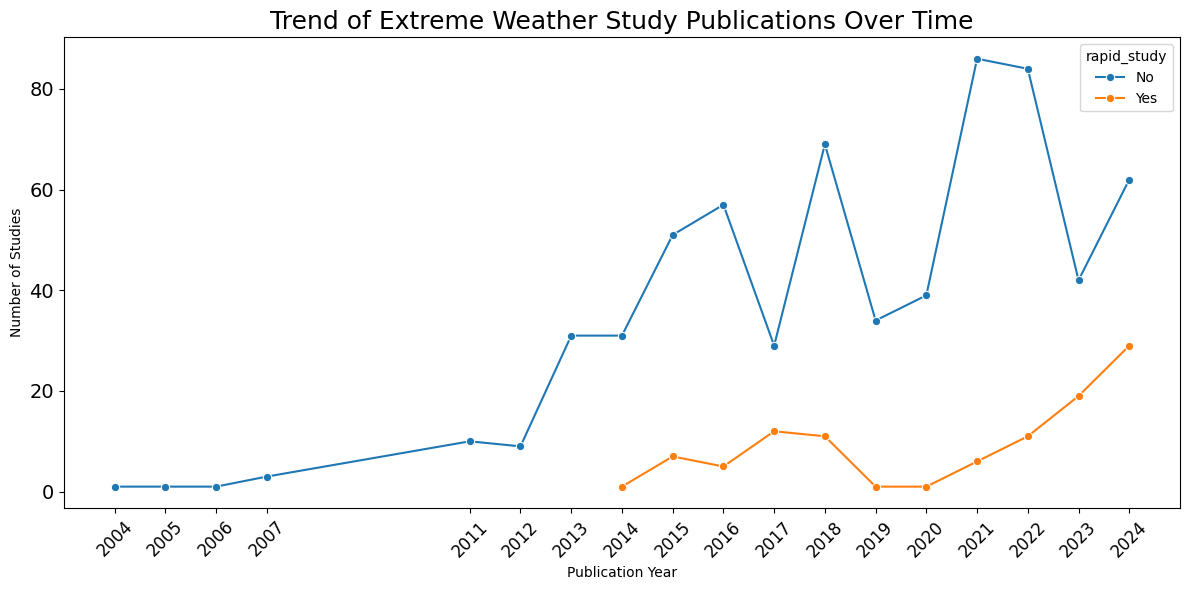

In [82]:
# Handle missing data for 'publication_year' by dropping (1 missing data row only)
df_publications = attribution_studies.copy()
df_publications = df_publications.dropna(subset=['publication_year'])
df_publications['publication_year'] = df_publications['publication_year'].astype(int)

# Plot 
plt.figure(figsize=(12, 6))
df_years = (df_publications.groupby(["publication_year", "rapid_study"]).size().reset_index(name="count"))
years = sorted(df_years['publication_year'].unique())

# Set 'rapid_study' as hue to visualise separate trends for rapid and non-rapid studies
sns.lineplot(data=df_years, x="publication_year", y="count", hue="rapid_study", marker="o")

# Plot Specifications
plt.title("Trend of Extreme Weather Study Publications Over Time", fontsize=18)
plt.xlabel("Publication Year")
plt.ylabel("Number of Studies")
plt.xticks(years, size=12, rotation=45)
plt.yticks(size=14)
plt.tight_layout()
plt.show()

### 3.5. Which type of extreme weather events have these publications studies across the years?

C:\Users\SAUMITA\AppData\Local\Temp\ipykernel_14820\980336537.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



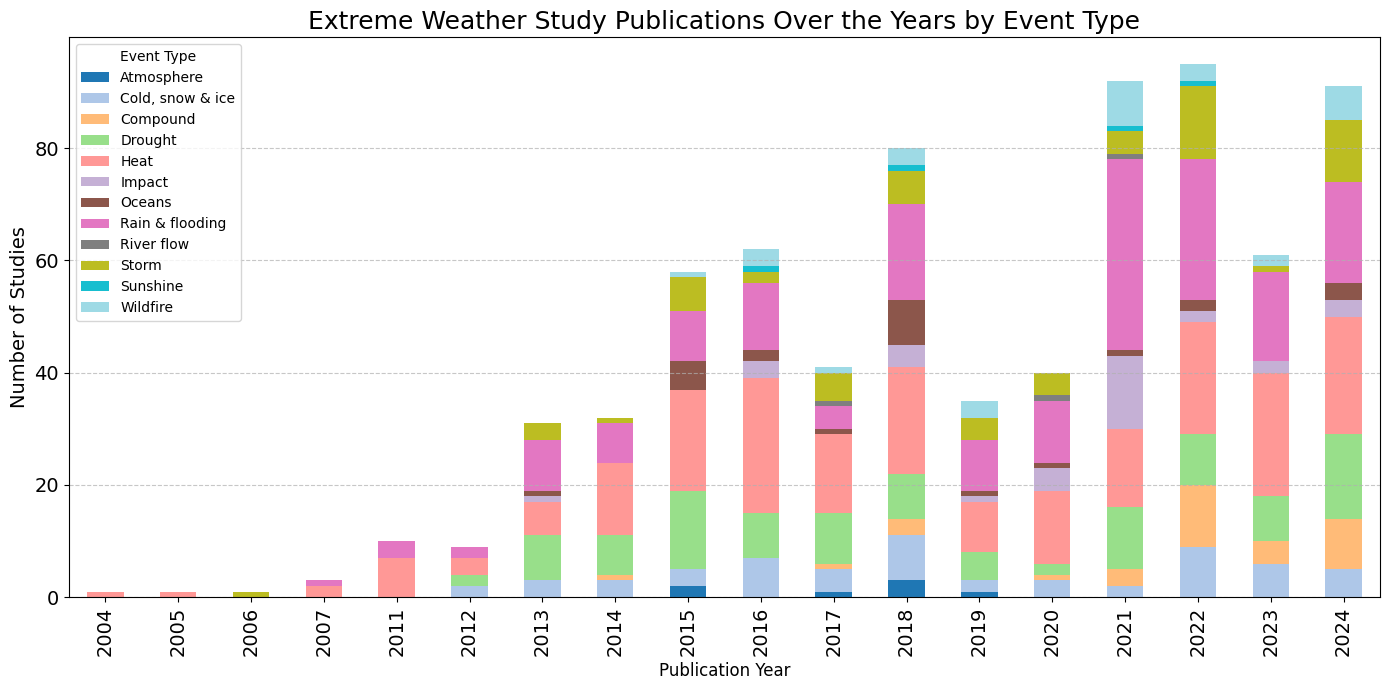

In [ ]:
# Clean and prepare
df_events = attribution_studies.dropna(subset=['publication_year'])
df_events['publication_year'] = df_events['publication_year'].astype(int)

# Aggregate counts per year and event type
df_year_event = (df_events.groupby(['publication_year', 'event_type']).size().reset_index(name='count'))

# Pivot to wide format for stacking
df_pivot = df_year_event.pivot(index='publication_year', columns='event_type', values='count').fillna(0)

# Plot
df_pivot.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')

plt.title("Extreme Weather Study Publications Over the Years by Event Type", fontsize=18)
plt.xlabel("Publication Year", size=12)
plt.ylabel("Number of Studies", size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Event Type", loc='upper left')
plt.tight_layout()
plt.show()